## Project description
Predict next-day rain by training classification models on the target variable RainTomorrow.

In [2]:
import pandas as pd

## 1.EDA & Fearure engineering

In [3]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
missing_values = df.isnull().any()
missing_index = missing_values[missing_values].index.tolist()
print(missing_index)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']


In [6]:
missing_count = df.isnull().sum()


pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 1000)  

print(missing_count)

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64


### 1.1 missing data

In [7]:
df = df.dropna(subset=['RainTomorrow'])

In [8]:
df = df.drop(['Date'],axis = 1)

In [9]:
df['Evaporation'].unique()

array([     nan, 1.20e+01, 1.48e+01, 1.26e+01, 1.08e+01, 1.14e+01,
       1.12e+01, 1.30e+01, 9.80e+00, 1.46e+01, 1.10e+01, 1.28e+01,
       1.38e+01, 1.64e+01, 1.74e+01, 1.60e+01, 1.36e+01, 8.00e+00,
       8.20e+00, 8.60e+00, 1.42e+01, 1.58e+01, 1.62e+01, 1.34e+01,
       1.44e+01, 1.18e+01, 1.56e+01, 1.52e+01, 1.16e+01, 9.60e+00,
       6.60e+00, 6.00e-01, 6.00e+00, 3.00e+00, 2.00e+00, 5.20e+00,
       9.00e+00, 1.02e+01, 1.00e+01, 7.40e+00, 8.40e+00, 9.20e+00,
       9.40e+00, 1.24e+01, 1.04e+01, 7.20e+00, 6.80e+00, 7.60e+00,
       4.40e+00, 6.40e+00, 7.80e+00, 7.00e+00, 8.80e+00, 6.20e+00,
       5.80e+00, 2.00e-01, 2.40e+00, 1.80e+00, 2.20e+00, 2.80e+00,
       5.00e+00, 5.60e+00, 4.80e+00, 4.20e+00, 4.00e+00, 3.20e+00,
       4.60e+00, 3.40e+00, 3.60e+00, 0.00e+00, 1.40e+00, 3.80e+00,
       8.00e-01, 2.60e+00, 1.60e+00, 1.20e+00, 1.00e+00, 5.40e+00,
       1.06e+01, 1.68e+01, 1.70e+01, 2.02e+01, 1.40e+01, 1.72e+01,
       1.22e+01, 1.50e+01, 1.82e+01, 1.32e+01, 4.10e+00, 1.70e

In [10]:
df['Sunshine'].unique()

array([ nan, 12.3, 13. , 13.3, 10.6, 12.2,  8.4,  0. , 12.6, 13.2, 12.7,
       12.1, 10.3, 13.1, 12.9, 11.3,  6.9, 10.9,  3.7,  5.9, 10.5, 12.4,
       13.4, 13.6,  7.4, 10. ,  2.3,  6.6,  0.3, 10.7, 11.6, 10.2,  9. ,
       12. ,  3. ,  7.9, 11.5, 11.2,  4.8,  5.8,  6. , 11.1, 11.8, 11.4,
       10.8,  7.8, 11. ,  5.5,  4.7,  4.2,  4.4,  6.2,  9.8,  9.9,  4.3,
        8. ,  9.6, 10.4,  9.3,  8.7,  7.6,  7.5, 10.1,  6.3,  2.8,  0.7,
        9.4,  9.7,  0.6,  5.1,  8.3,  4.1,  3.9,  6.8,  8.6,  2.7,  8.2,
        3.1,  1.8,  0.1,  0.8,  3.4,  7.1,  5. ,  5.7,  6.1,  7. ,  2.9,
        2.5,  4.6,  8.9,  9.1,  1.7,  8.1,  9.5,  1.2,  1.4,  8.8,  2.2,
        3.5,  9.2,  1.9, 11.7, 11.9,  7.7,  0.9, 12.5,  2.1, 12.8, 13.7,
        8.5,  0.2,  4. ,  2.4,  5.2,  0.5,  6.4,  4.5,  1.1,  2. ,  0.4,
        1.5,  3.3,  6.5,  2.6,  3.8,  3.6,  3.2,  6.7,  5.4,  7.2,  4.9,
        1. ,  1.6,  5.3,  7.3,  5.6,  1.3, 13.8, 13.5, 14. , 13.9, 14.1,
       14.5, 14.3, 14.2])

In [11]:
# change 'Evaporation' and 'Sunshine' into category data
df['Evaporation'] = df['Evaporation'].notna().astype(int)
df['Sunshine'] = df['Sunshine'].notna().astype(int)

In [12]:
# change 'RainToday' and 'RainTomorrow' into category data
df['RainToday'] = df['RainToday'].notna().astype(int)
df['RainTomorrow'] = df['RainTomorrow'].replace({'No': 0, 'Yes': 1})


In [13]:
df['WindDir3pm_encoded'] = pd.factorize(df['WindDir3pm'])[0] 
df['WindDir9am_encoded'] = pd.factorize(df['WindDir9am'])[0] 
df['WindGustDir_encoded'] = pd.factorize(df['WindGustDir'])[0]     

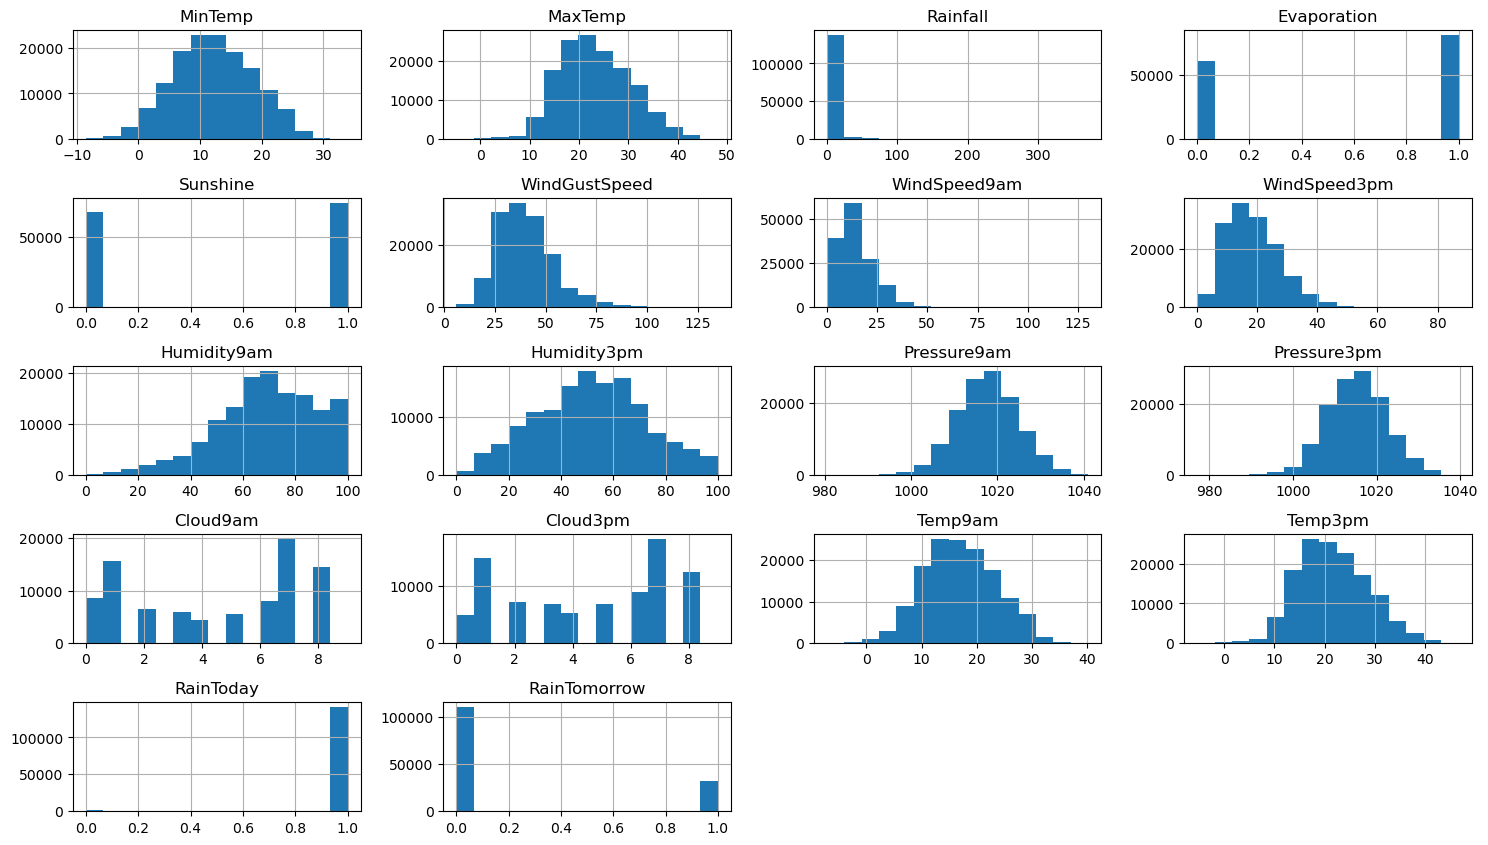

In [14]:
import matplotlib.pyplot as plt
import numpy as np

def plot_histograms(dataframe, columns):
    
    num_columns = len(columns)
    num_rows = int(np.ceil(num_columns / 4.0))  

    dataframe[columns].hist(bins=15, figsize=(15, 10), layout=(num_rows, 4))
    plt.tight_layout()
    plt.show()

plot_histograms(df, missing_index)



In [15]:
'''it seems ['MinTemp', 'MaxTemp', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm'] 
have nomal distribution, so I fill the missing value with mean'''

columns_to_fill = ['MinTemp', 'MaxTemp', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
means = df[columns_to_fill].mean()
df[columns_to_fill] = df[columns_to_fill].fillna(means)
print(df[columns_to_fill].isnull().sum())


MinTemp        0
MaxTemp        0
Humidity3pm    0
Pressure9am    0
Pressure3pm    0
Temp9am        0
Temp3pm        0
dtype: int64


In [16]:
'''other columns fill the miss value with median & mode'''

columns_to_replace = ['WindDir3pm_encoded', 'WindDir9am_encoded', 'WindGustDir_encoded']

for column in columns_to_replace:
    mode_value = df[column].mode()[0]
    df[column] = df[column].replace(-1, mode_value)

columns_to_fill = ['Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Cloud9am', 'Cloud3pm', 'RainToday']
medians = df[columns_to_fill].median()
df[columns_to_fill] = df[columns_to_fill].fillna(medians)


In [17]:
df = df.drop(['WindDir3pm', 'WindDir9am', 'WindGustDir'], axis=1)
missing_count = df.isnull().sum()


pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 1000)  

print(missing_count)

Location               0
MinTemp                0
MaxTemp                0
Rainfall               0
Evaporation            0
Sunshine               0
WindGustSpeed          0
WindSpeed9am           0
WindSpeed3pm           0
Humidity9am            0
Humidity3pm            0
Pressure9am            0
Pressure3pm            0
Cloud9am               0
Cloud3pm               0
Temp9am                0
Temp3pm                0
RainToday              0
RainTomorrow           0
WindDir3pm_encoded     0
WindDir9am_encoded     0
WindGustDir_encoded    0
dtype: int64


### 1.2 Feature scaling

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Location             142193 non-null  object 
 1   MinTemp              142193 non-null  float64
 2   MaxTemp              142193 non-null  float64
 3   Rainfall             142193 non-null  float64
 4   Evaporation          142193 non-null  int32  
 5   Sunshine             142193 non-null  int32  
 6   WindGustSpeed        142193 non-null  float64
 7   WindSpeed9am         142193 non-null  float64
 8   WindSpeed3pm         142193 non-null  float64
 9   Humidity9am          142193 non-null  float64
 10  Humidity3pm          142193 non-null  float64
 11  Pressure9am          142193 non-null  float64
 12  Pressure3pm          142193 non-null  float64
 13  Cloud9am             142193 non-null  float64
 14  Cloud3pm             142193 non-null  float64
 15  Temp9am          

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['location_encoded'] = le.fit_transform(df['Location'])

df = df.drop(['Location'],axis = 1)


In [20]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer



rain_tomorrow = df['RainTomorrow'].copy().reset_index(drop=True)


categorical_features = ['Evaporation', 'Sunshine', 'WindDir3pm_encoded', 'WindDir9am_encoded', 'WindGustDir_encoded', 'RainToday']
numerical_features = df.columns.difference(categorical_features + ['RainTomorrow'])  

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

df_transformed = preprocessor.fit_transform(df)

ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out()
all_feature_names = list(numerical_features) + list(ohe_feature_names)

df = pd.DataFrame(df_transformed, columns=all_feature_names)

df['RainTomorrow'] = rain_tomorrow




## 2. Model Training

#### 2.1 RandomForest model

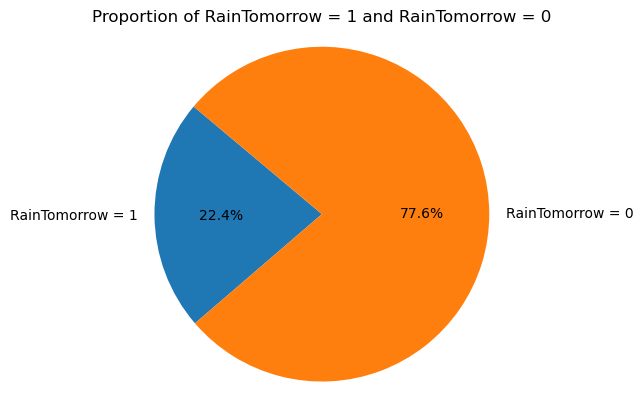

'inbalanced dataset'

In [21]:
class_counts = df['RainTomorrow'].value_counts()

labels = ['RainTomorrow = 1', 'RainTomorrow = 0']
sizes = [class_counts.get(1, 0), class_counts.get(0, 0)]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')

plt.title('Proportion of RainTomorrow = 1 and RainTomorrow = 0')

plt.show()
"""inbalanced dataset"""

In [22]:
from sklearn.model_selection import train_test_split

X = df.drop('RainTomorrow', axis=1)  
y = df['RainTomorrow']  # target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)  


print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (113754, 63)
Testing set size: (28439, 63)


In [23]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=150, random_state=66)
classifier.fit(X_train,y_train)

ypred = classifier.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score, classification_report

print('train accuracy:',classifier.score(X_train,y_train))
print('test accuracy:',accuracy_score(y_test,ypred))
print("Classification Report on Test Data:\n", classification_report(y_test, ypred))

train accuracy: 0.9999472546020359
test accuracy: 0.8542142832026443
Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91     21995
           1       0.78      0.50      0.61      6444

    accuracy                           0.85     28439
   macro avg       0.82      0.73      0.76     28439
weighted avg       0.85      0.85      0.84     28439


In [25]:
####

In [26]:
classifier = RandomForestClassifier(n_estimators=150,oob_score=True, random_state=66, class_weight='balanced_subsample')
classifier.fit(X_train,y_train)
ypred = classifier.predict(X_test)


In [27]:
print('train accuracy:',classifier.score(X_train,y_train))
print('test accuracy:',accuracy_score(y_test,ypred))
print("Classification Report on Test Data:\n", classification_report(y_test, ypred))

train accuracy: 0.9999560455016966
test accuracy: 0.8527022750448328
Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91     21995
           1       0.79      0.48      0.60      6444

    accuracy                           0.85     28439
   macro avg       0.83      0.72      0.75     28439
weighted avg       0.85      0.85      0.84     28439


In [28]:
####

In [29]:
classifier = RandomForestClassifier(n_estimators=150,oob_score=False, random_state=66,class_weight='balanced')
classifier.fit(X_train,y_train)
ypred = classifier.predict(X_test)

In [30]:
print('train accuracy:',classifier.score(X_train,y_train))
print('test accuracy:',accuracy_score(y_test,ypred))
print("Classification Report on Test Data:\n", classification_report(y_test, ypred))

train accuracy: 0.9999472546020359
test accuracy: 0.8517177115932346
Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91     21995
           1       0.78      0.48      0.59      6444

    accuracy                           0.85     28439
   macro avg       0.82      0.72      0.75     28439
weighted avg       0.84      0.85      0.84     28439


In [31]:
####

In [32]:
classifier = RandomForestClassifier(n_estimators=150,bootstrap=False, random_state=66,class_weight='balanced')
classifier.fit(X_train,y_train)
ypred = classifier.predict(X_test)

In [33]:
print('train accuracy:',classifier.score(X_train,y_train))
print('test accuracy:',accuracy_score(y_test,ypred))
print("Classification Report on Test Data:\n", classification_report(y_test, ypred))

train accuracy: 0.9999560455016966
test accuracy: 0.8539681423397447
Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91     21995
           1       0.79      0.49      0.60      6444

    accuracy                           0.85     28439
   macro avg       0.83      0.72      0.76     28439
weighted avg       0.85      0.85      0.84     28439


#### 2.2 SVM model

In [34]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=66)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

print("Classification Report on Test Data:\n", classification_report(y_test, y_pred))

Training Accuracy: 0.8651036447069993
Testing Accuracy: 0.8547768908892718
Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91     21995
           1       0.79      0.48      0.60      6444

    accuracy                           0.85     28439
   macro avg       0.83      0.72      0.76     28439
weighted avg       0.85      0.85      0.84     28439


In [35]:
####

In [36]:
classifier = SVC(kernel='sigmoid', C=1.0, gamma='auto',class_weight='balanced', random_state=66)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

print("Classification Report on Test Data:\n", classification_report(y_test, y_pred))

Training Accuracy: 0.7233415967790143
Testing Accuracy: 0.7223179436689053
Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.90      0.72      0.80     21995
           1       0.43      0.73      0.54      6444

    accuracy                           0.72     28439
   macro avg       0.67      0.73      0.67     28439
weighted avg       0.79      0.72      0.74     28439


In [37]:
####

In [38]:
classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=66)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

print("Classification Report on Test Data:\n", classification_report(y_test, y_pred))

Training Accuracy: 0.8651036447069993
Testing Accuracy: 0.8547768908892718
Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91     21995
           1       0.79      0.48      0.60      6444

    accuracy                           0.85     28439
   macro avg       0.83      0.72      0.76     28439
weighted avg       0.85      0.85      0.84     28439


In [39]:
###

In [40]:
classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=66,class_weight='balanced')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

print("Classification Report on Test Data:\n", classification_report(y_test, y_pred))

Training Accuracy: 0.8265379678956344
Testing Accuracy: 0.8143394634129189
Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.93      0.82      0.87     21995
           1       0.56      0.80      0.66      6444

    accuracy                           0.81     28439
   macro avg       0.75      0.81      0.77     28439
weighted avg       0.85      0.81      0.82     28439


In [41]:
'''I chose the SVM model. Since would be the preferred choice for practical application, especially 
in scenarios where balancing false alarms and missed predictions is necessary'''



mymodel = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=66,class_weight='balanced')
mymodel.fit(X_train, y_train)

SVC(class_weight='balanced', random_state=66)